In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('general_data.csv')
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [3]:
df.describe()

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,2205.500000,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,15.209524,8.0,...,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,1273.201673,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.498887,3.659108,0.0,...,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,1.000000,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1103.250000,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2205.500000,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3307.750000,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4410.000000,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [4]:
df.shape

(4410, 29)

In [5]:
df = df.drop('EmployeeID', axis=1)

In [6]:
df.shape

(4410, 28)

In [7]:
df.Age.describe()

count    4410.000000
mean       36.923810
std         9.133301
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

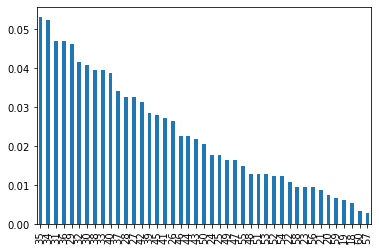

In [8]:
df.Age.value_counts(normalize=True).plot.bar()
plt.show()

### Bining Age into 3 categories
- (17.958, 32.0] : young
- (32.0, 46.0] : middle
- (46.0, 60.0] : old

In [9]:
df.Age = pd.cut(df.Age, bins=3, right=True, labels=["young", "middle", "old"])

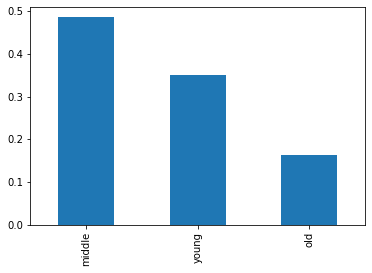

In [10]:
df.Age.value_counts(normalize=True).plot.bar()
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      4410 non-null   category
 1   Attrition                4410 non-null   object  
 2   BusinessTravel           4410 non-null   object  
 3   Department               4410 non-null   object  
 4   DistanceFromHome         4410 non-null   int64   
 5   Education                4410 non-null   int64   
 6   EducationField           4410 non-null   object  
 7   EmployeeCount            4410 non-null   int64   
 8   Gender                   4410 non-null   object  
 9   JobLevel                 4410 non-null   int64   
 10  JobRole                  4410 non-null   object  
 11  MaritalStatus            4410 non-null   object  
 12  MonthlyIncome            4410 non-null   int64   
 13  NumCompaniesWorked       4391 non-null   float64 
 14  Over18  

In [12]:
df.Attrition.describe()

count     4410
unique       2
top         No
freq      3699
Name: Attrition, dtype: object

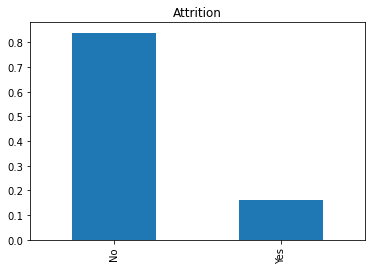

In [13]:
df.Attrition.value_counts(normalize=True).plot.bar(title = 'Attrition')
plt.show()

In [14]:
df['Attrition'] = df['Attrition'].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      4410 non-null   category
 1   Attrition                4410 non-null   category
 2   BusinessTravel           4410 non-null   object  
 3   Department               4410 non-null   object  
 4   DistanceFromHome         4410 non-null   int64   
 5   Education                4410 non-null   int64   
 6   EducationField           4410 non-null   object  
 7   EmployeeCount            4410 non-null   int64   
 8   Gender                   4410 non-null   object  
 9   JobLevel                 4410 non-null   int64   
 10  JobRole                  4410 non-null   object  
 11  MaritalStatus            4410 non-null   object  
 12  MonthlyIncome            4410 non-null   int64   
 13  NumCompaniesWorked       4391 non-null   float64 
 14  Over18  

### Drop EmployeeCount

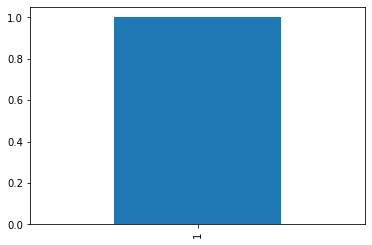

In [16]:
df.EmployeeCount.value_counts(normalize=True).plot.bar()
plt.show()

In [17]:
df = df.drop('EmployeeCount', axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      4410 non-null   category
 1   Attrition                4410 non-null   category
 2   BusinessTravel           4410 non-null   object  
 3   Department               4410 non-null   object  
 4   DistanceFromHome         4410 non-null   int64   
 5   Education                4410 non-null   int64   
 6   EducationField           4410 non-null   object  
 7   Gender                   4410 non-null   object  
 8   JobLevel                 4410 non-null   int64   
 9   JobRole                  4410 non-null   object  
 10  MaritalStatus            4410 non-null   object  
 11  MonthlyIncome            4410 non-null   int64   
 12  NumCompaniesWorked       4391 non-null   float64 
 13  Over18                   4410 non-null   object  
 14  PercentS

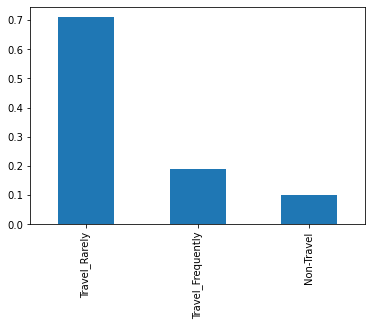

In [19]:
df.BusinessTravel.value_counts(normalize=True).plot.bar()
plt.show()

In [20]:
df['BusinessTravel'] = df['BusinessTravel'].astype('category')

In [21]:
df.BusinessTravel.describe()

count              4410
unique                3
top       Travel_Rarely
freq               3129
Name: BusinessTravel, dtype: object

In [22]:
df.describe()

,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,9.192517,2.912925,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,8.105026,1.023933,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,2.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,7.000000,3.000000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,14.000000,4.000000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [23]:
df.DistanceFromHome.unique()

array([ 6, 10, 17,  2,  8, 11, 18,  1,  7, 28, 14,  3,  4, 16,  9,  5, 20,
       29, 15, 13, 24, 19, 22, 25, 21, 26, 27, 12, 23])

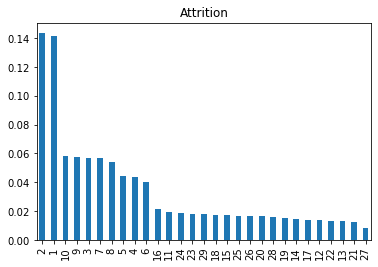

In [24]:
df.DistanceFromHome.value_counts(normalize=True).plot.bar(title = 'Attrition')
plt.show()

In [25]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,old,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,young,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,young,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,middle,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,young,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      4410 non-null   category
 1   Attrition                4410 non-null   category
 2   BusinessTravel           4410 non-null   category
 3   Department               4410 non-null   object  
 4   DistanceFromHome         4410 non-null   int64   
 5   Education                4410 non-null   int64   
 6   EducationField           4410 non-null   object  
 7   Gender                   4410 non-null   object  
 8   JobLevel                 4410 non-null   int64   
 9   JobRole                  4410 non-null   object  
 10  MaritalStatus            4410 non-null   object  
 11  MonthlyIncome            4410 non-null   int64   
 12  NumCompaniesWorked       4391 non-null   float64 
 13  Over18                   4410 non-null   object  
 14  PercentS

### Drop Over18

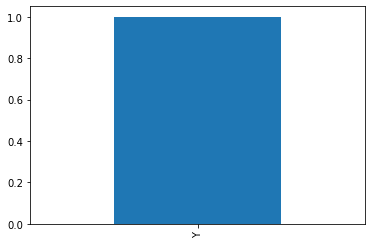

In [27]:
df.Over18.value_counts(normalize=True).plot.bar()
plt.show()

In [28]:
df = df.drop('Over18', axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      4410 non-null   category
 1   Attrition                4410 non-null   category
 2   BusinessTravel           4410 non-null   category
 3   Department               4410 non-null   object  
 4   DistanceFromHome         4410 non-null   int64   
 5   Education                4410 non-null   int64   
 6   EducationField           4410 non-null   object  
 7   Gender                   4410 non-null   object  
 8   JobLevel                 4410 non-null   int64   
 9   JobRole                  4410 non-null   object  
 10  MaritalStatus            4410 non-null   object  
 11  MonthlyIncome            4410 non-null   int64   
 12  NumCompaniesWorked       4391 non-null   float64 
 13  PercentSalaryHike        4410 non-null   int64   
 14  Standard

### Converting Gender for ease of processing
- 'Female' : 0
- 'Male' : 1

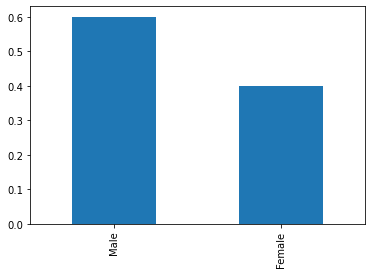

In [30]:
df.Gender.value_counts(normalize=True).plot.bar()
plt.show()

In [31]:
df['Gender'].replace(['Female','Male'], [0,1],inplace=True)

In [32]:
df.Gender.head(10)

0    0
1    0
2    1
3    1
4    1
5    0
6    1
7    1
8    1
9    0
Name: Gender, dtype: int64

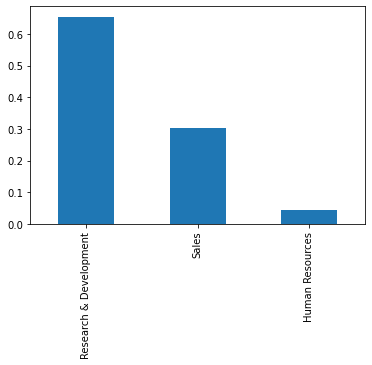

In [33]:
df.Department.value_counts(normalize=True).plot.bar()
plt.show()

In [34]:
df['Department'] = df['Department'].astype('category')

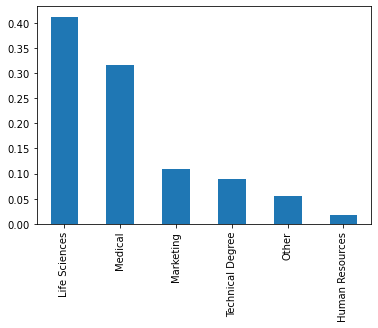

In [35]:
df.EducationField.value_counts(normalize=True).plot.bar()
plt.show()

In [36]:
df.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      4410 non-null   category
 1   Attrition                4410 non-null   category
 2   BusinessTravel           4410 non-null   category
 3   Department               4410 non-null   category
 4   DistanceFromHome         4410 non-null   int64   
 5   Education                4410 non-null   int64   
 6   EducationField           4410 non-null   object  
 7   Gender                   4410 non-null   int64   
 8   JobLevel                 4410 non-null   int64   
 9   JobRole                  4410 non-null   object  
 10  MaritalStatus            4410 non-null   object  
 11  MonthlyIncome            4410 non-null   int64   
 12  NumCompaniesWorked       4391 non-null   float64 
 13  PercentSalaryHike        4410 non-null   int64   
 14  Standard

### Handling Missing Values

In [38]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [39]:
df.isna().mean().round(5)*100

Age                        0.000
Attrition                  0.000
BusinessTravel             0.000
Department                 0.000
DistanceFromHome           0.000
Education                  0.000
EducationField             0.000
Gender                     0.000
JobLevel                   0.000
JobRole                    0.000
MaritalStatus              0.000
MonthlyIncome              0.000
NumCompaniesWorked         0.431
PercentSalaryHike          0.000
StandardHours              0.000
StockOptionLevel           0.000
TotalWorkingYears          0.204
TrainingTimesLastYear      0.000
YearsAtCompany             0.000
YearsSinceLastPromotion    0.000
YearsWithCurrManager       0.000
EnvironmentSatisfaction    0.567
JobSatisfaction            0.454
WorkLifeBalance            0.862
JobInvolvement             0.000
PerformanceRating          0.000
dtype: float64

#### NumCompaniesWorked

In [41]:
df.NumCompaniesWorked.describe()

count    4391.000000
mean        2.694830
std         2.498887
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

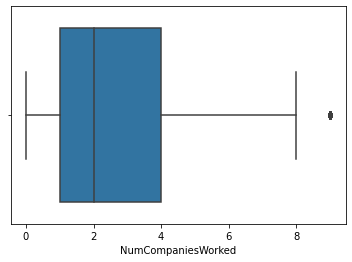

In [40]:
#Analyse the  column 'NumCompaniesWorked' for outliers.
sb.boxplot(df['NumCompaniesWorked'])
plt.show()

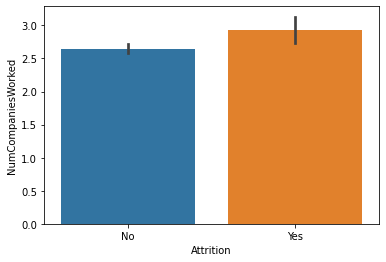

In [42]:
sb.barplot(df.Attrition, df.NumCompaniesWorked)
plt.show()

In [43]:
df['NumCompaniesWorked'].fillna(int(df['NumCompaniesWorked'].mean()), inplace=True)

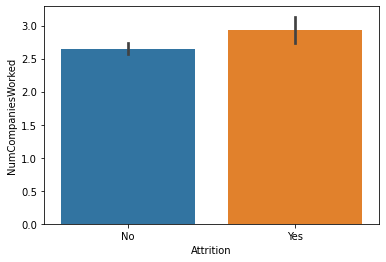

In [44]:
sb.barplot(df.Attrition, df.NumCompaniesWorked)
plt.show()

In [45]:
df.NumCompaniesWorked.isnull().mean()

0.0

#### TotalWorkingYears

In [46]:
df.TotalWorkingYears.describe()

count    4401.000000
mean       11.279936
std         7.782222
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

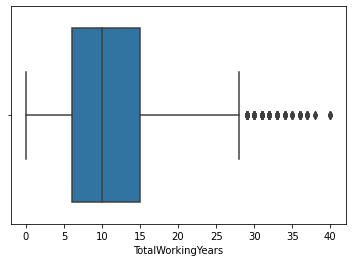

In [47]:
#Analyse the  column 'TotalWorkingYears' for outliers.
sb.boxplot(df['TotalWorkingYears'])
plt.show()

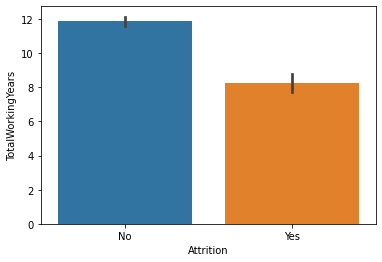

In [48]:
sb.barplot(df.Attrition, df.TotalWorkingYears)
plt.show()

In [49]:
df['TotalWorkingYears'].fillna(float(df['TotalWorkingYears'].mean()), inplace=True)

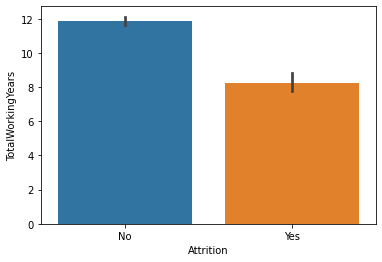

In [50]:
sb.barplot(df.Attrition, df.TotalWorkingYears)
plt.show()

In [51]:
df.TotalWorkingYears.isnull().mean()

0.0

#### EnvironmentSatisfaction


In [52]:
df.EnvironmentSatisfaction.describe()

count    4385.000000
mean        2.723603
std         1.092756
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64

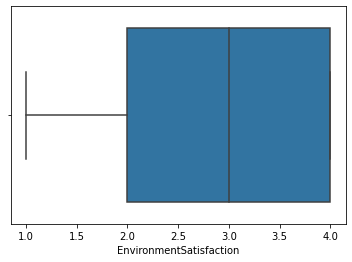

In [53]:
#Analyse the  column 'EnvironmentSatisfaction' for outliers.
sb.boxplot(df['EnvironmentSatisfaction'])
plt.show()

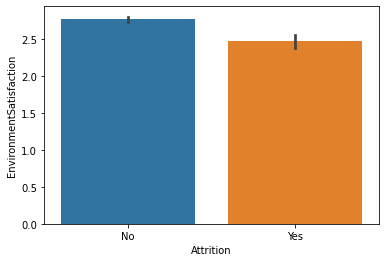

In [74]:
sb.barplot(df.Attrition, df.EnvironmentSatisfaction)
plt.show()

In [66]:
df['EnvironmentSatisfaction'].fillna(float(df['EnvironmentSatisfaction'].median()), inplace=True)

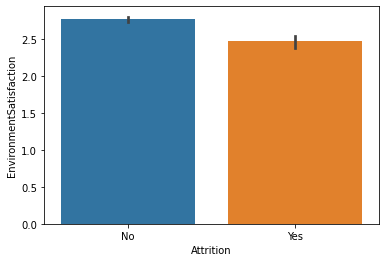

In [67]:
sb.barplot(df.Attrition, df.EnvironmentSatisfaction)
plt.show()

In [73]:
df.EnvironmentSatisfaction.isnull().mean()

0.0

#### WorkLifeBalance

In [59]:
df.WorkLifeBalance.describe()

count    4372.000000
mean        2.761436
std         0.706245
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: WorkLifeBalance, dtype: float64

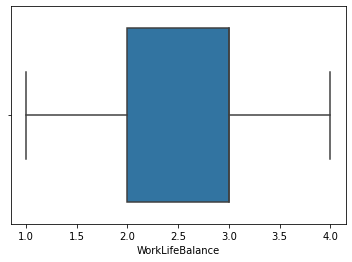

In [60]:
sb.boxplot(df['WorkLifeBalance'])
plt.show()

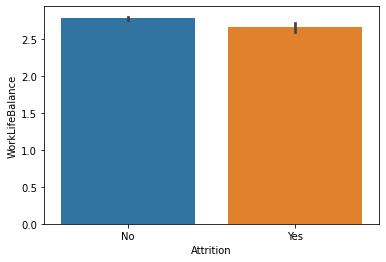

In [58]:
sb.barplot(df.Attrition, df.WorkLifeBalance)
plt.show()

In [61]:
df['WorkLifeBalance'].fillna(float(df['WorkLifeBalance'].median()), inplace=True)

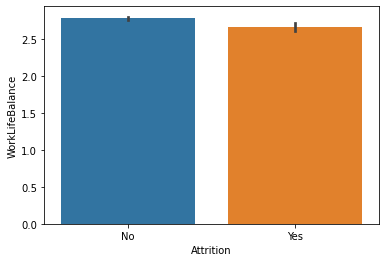

In [62]:
sb.barplot(df.Attrition, df.WorkLifeBalance)
plt.show()

In [71]:
df.WorkLifeBalance.isnull().mean()

0.0

#### JobSatisfaction

In [76]:
df.JobSatisfaction.describe()

count    4390.000000
mean        2.728246
std         1.101253
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

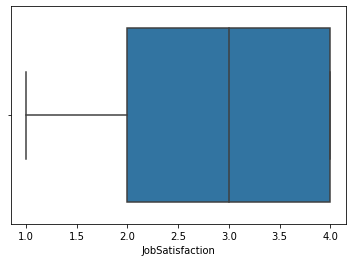

In [77]:
sb.boxplot(df['JobSatisfaction'])
plt.show()

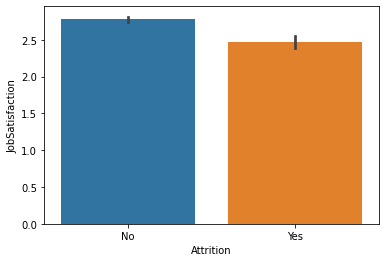

In [78]:
sb.barplot(df.Attrition, df.JobSatisfaction)
plt.show()

In [79]:
df['JobSatisfaction'].fillna(float(df['JobSatisfaction'].median()), inplace=True)

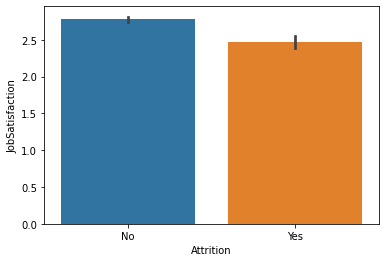

In [80]:
sb.barplot(df.Attrition, df.JobSatisfaction)
plt.show()

In [81]:
df.JobSatisfaction.isnull().mean()

0.0

In [84]:
df.isna().mean().round(5)*100

Age                        0.0
Attrition                  0.0
BusinessTravel             0.0
Department                 0.0
DistanceFromHome           0.0
Education                  0.0
EducationField             0.0
Gender                     0.0
JobLevel                   0.0
JobRole                    0.0
MaritalStatus              0.0
MonthlyIncome              0.0
NumCompaniesWorked         0.0
PercentSalaryHike          0.0
StandardHours              0.0
StockOptionLevel           0.0
TotalWorkingYears          0.0
TrainingTimesLastYear      0.0
YearsAtCompany             0.0
YearsSinceLastPromotion    0.0
YearsWithCurrManager       0.0
EnvironmentSatisfaction    0.0
JobSatisfaction            0.0
WorkLifeBalance            0.0
JobInvolvement             0.0
PerformanceRating          0.0
dtype: float64